<a href="https://colab.research.google.com/github/mitchellsabbadini/ml-img/blob/main/cnn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchvision

In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import torchvision.datasets

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cpu')

In [4]:
def imshow(sample_element, shape = (28, 28)):
    plt.imshow(sample_element[0].detach().numpy().reshape(shape), cmap='gray')
    plt.title('Label = ' + str(sample_element[1]))
    plt.show()

In [ ]:
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=T.ToTensor()
)

In [6]:
classes = dataset.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

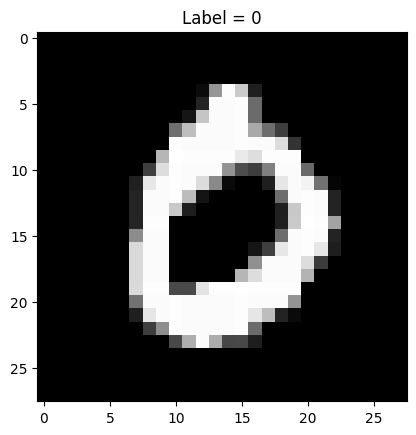

In [7]:
imshow(dataset[3])

In [8]:
def show_transform(image, m):  
  img, label = image
  out = m(img)
  _, x, y = out.shape
  transformed = (out, label)
  print((x, y))
  imshow(transformed, shape=(x, y))

(28, 28)


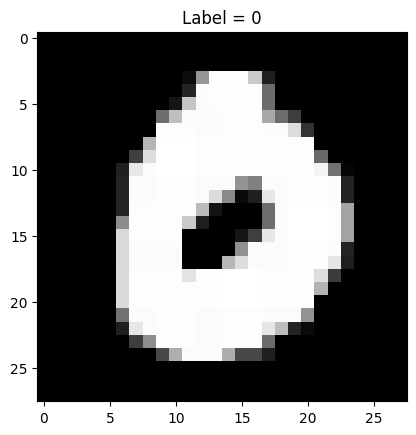

In [9]:
a = nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
image = dataset[3]

show_transform(image, a)

(28, 28)


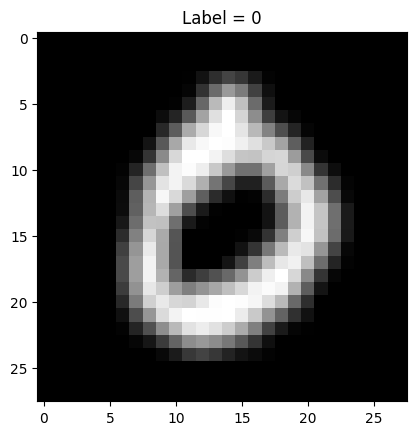

In [10]:
b = nn.AvgPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

show_transform(image, b)

In [11]:
def wrap(image, func):
  img, label = image
  out = func(img)
  return (out, label)

(28, 28)


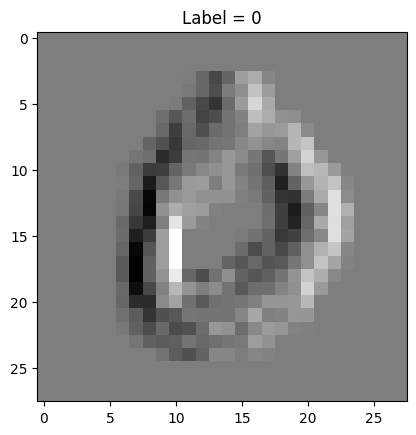

In [35]:
c = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), padding=1)

transformed = wrap(dataset[3], c)
show_transform(dataset[3], c)

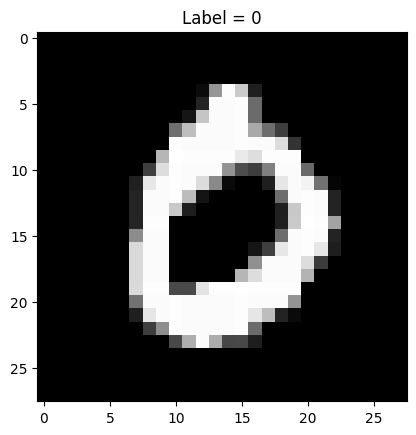

In [13]:
imshow(dataset[3])

In [17]:
#Sequential

image = dataset[3]

relu = nn.ReLU()
sigmoid = nn.Sigmoid()

layer1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3))
layer2 = nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
layer3 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3))
layer4 = nn.AvgPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
layer5 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3))
layer6 = nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

(26, 26)


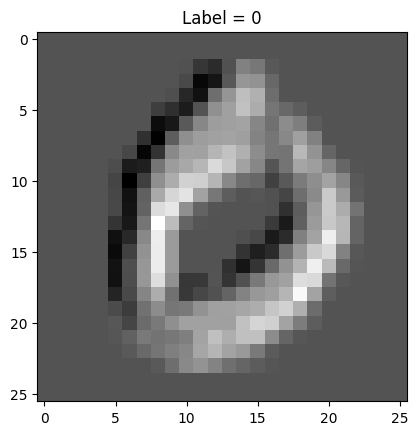

(26, 26)


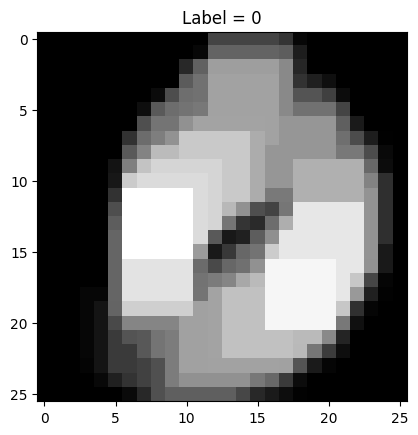

(24, 24)


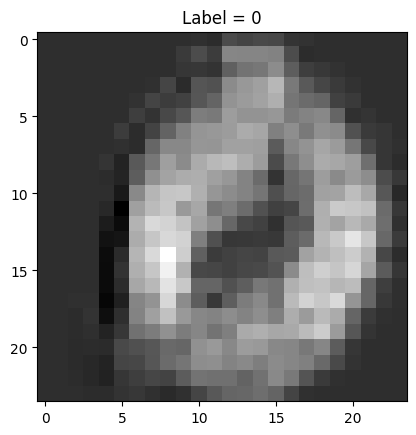

(24, 24)


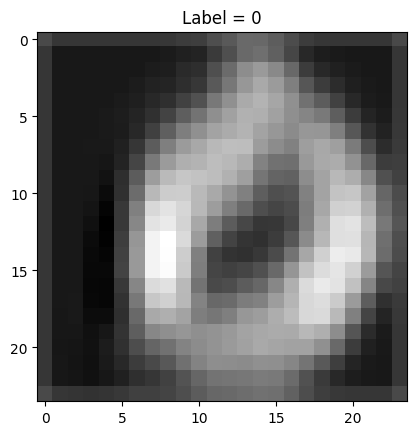

(22, 22)


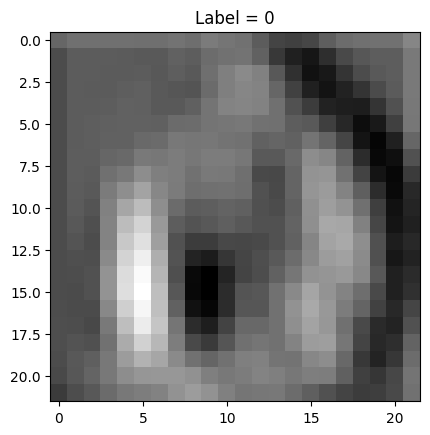

(22, 22)


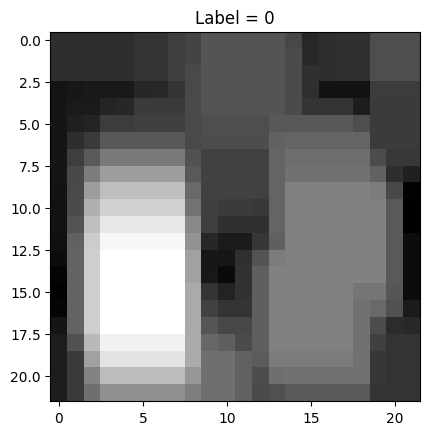

In [36]:
#layer1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), padding=1)

conv1 = wrap(image, layer1)
show_transform(image, layer1)

#layer2 = nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

conv2 = wrap(conv1, layer2)
show_transform(conv2, layer2)

#layer3 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), padding=1)

conv3 = wrap(conv2, layer3)
show_transform(conv2, layer3)

#layer4 = nn.AvgPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

conv4 = wrap(conv3, layer4)
show_transform(conv3, layer4)

#layer5 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3), padding=1)

conv5 = wrap(conv4, layer5)
show_transform(conv4, layer5)

#layer6 = nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

conv6 = wrap(conv5, layer6)
show_transform(conv6, layer6)

In [19]:
# Flatten Layer

m = nn.Flatten()
img, _ = image

out = m(img)

out.size()

torch.Size([1, 784])

In [20]:
# Load train & test data

train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = T.ToTensor(), 
    download = True,            
)

test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = T.ToTensor()
)

train_loader = torch.utils.data.DataLoader(
    train_data, 
    batch_size=100, 
    shuffle=True, 
    num_workers=1
)

test_loader = torch.utils.data.DataLoader(
    test_data, 
    batch_size=100, 
    shuffle=True, 
    num_workers=1
)

classes = train_data.classes

In [21]:
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [22]:
# Setup model

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.pool = nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 3))
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(22*22, 45) # Remember the dimensions of our last image?
    self.fc2 = nn.Linear(45, 10)

  def forward(self, x):
    
    x = self.pool(self.relu(self.conv(x)))
    x = self.pool(self.relu(self.conv(x)))
    x = self.pool(self.relu(self.conv(x)))

    x = x.view(x.size(0), -1) #flatten
    x = self.fc1(x)
    out = self.fc2(x)
    return out, x

cnn = CNN()

In [30]:
print(cnn)

CNN(
  (pool): MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), dilation=1, ceil_mode=False)
  (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (fc1): Linear(in_features=484, out_features=45, bias=True)
  (fc2): Linear(in_features=45, out_features=10, bias=True)
)


In [31]:
from torch import optim

# Define loss & optimizer

optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
loss_func = nn.CrossEntropyLoss()

In [32]:
# Train loop

num_epochs = 10

for epoch in range(num_epochs):

  running_loss = 0.0

  for i, data in enumerate(train_loader, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs, _ = cnn(inputs)
      loss = loss_func(outputs, labels)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      if i % 100 == 99:    # print every 100 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
          running_loss = 0.0

[1,   100] loss: 0.995
[1,   200] loss: 0.431
[1,   300] loss: 0.389
[1,   400] loss: 0.393
[1,   500] loss: 0.369
[1,   600] loss: 0.371
[2,   100] loss: 0.348
[2,   200] loss: 0.357
[2,   300] loss: 0.314
[2,   400] loss: 0.338
[2,   500] loss: 0.335
[2,   600] loss: 0.332
[3,   100] loss: 0.330
[3,   200] loss: 0.321
[3,   300] loss: 0.312
[3,   400] loss: 0.331
[3,   500] loss: 0.346
[3,   600] loss: 0.315
[4,   100] loss: 0.323
[4,   200] loss: 0.315
[4,   300] loss: 0.298
[4,   400] loss: 0.315
[4,   500] loss: 0.332
[4,   600] loss: 0.316
[5,   100] loss: 0.302
[5,   200] loss: 0.330
[5,   300] loss: 0.314
[5,   400] loss: 0.336
[5,   500] loss: 0.311
[5,   600] loss: 0.315
[6,   100] loss: 0.323
[6,   200] loss: 0.323
[6,   300] loss: 0.297
[6,   400] loss: 0.303
[6,   500] loss: 0.302
[6,   600] loss: 0.296
[7,   100] loss: 0.324
[7,   200] loss: 0.303
[7,   300] loss: 0.297
[7,   400] loss: 0.337
[7,   500] loss: 0.295
[7,   600] loss: 0.304
[8,   100] loss: 0.303
[8,   200] 

In [62]:
# SAVE MODEL 

PATH = './cnn.pth'
torch.save(cnn.state_dict(), PATH)

In [ ]:
# LOAD MODEL

PATH = './cnn.pth'
cnn = CNN()
cnn.load_state_dict(torch.load(PATH))

In [33]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs, _ = cnn(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 92 %
